### 1. Ibrahim Muhammad 1301194069
### 2. Livia Naura Aqilla 1301194089
### Kelas : IF-43-PIL-IS02

In [158]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [159]:
#import library
import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd 
pd.options.mode.chained_assignment = None
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from IPython.display import Image
from matplotlib import style
from scipy import stats
from six import StringIO
from sklearn import preprocessing,svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

%matplotlib inline
plt.style.use("ggplot")

## Eksplorasi Data

In [160]:
#import dataset 
!gdown --id 1jAMqhaWScfZR9T5l8ir6f8_cPkdhbqLp
!gdown --id 10o3_8x-jVwhJ84ydXULQknhKuKxiX06W

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jAMqhaWScfZR9T5l8ir6f8_cPkdhbqLp
To: /content/test.csv
100% 23.3k/23.3k [00:00<00:00, 23.1MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10o3_8x-jVwhJ84ydXULQknhKuKxiX06W
To: /content/train.csv
100% 102k/102k [00:00<00:00, 51.7MB/s]


In [161]:
#membaca data dan menampilkan isi data pada 5 teratas
df = pd.read_csv('train.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.1471,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.186,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.1279,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.1052,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198,0.1043,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4,0.1625,0.2364,0.07678


In [162]:
#info jumlah dan tipe data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       463 non-null    int64  
 1   diagnosis                463 non-null    object 
 2   radius_mean              463 non-null    float64
 3   texture_mean             463 non-null    float64
 4   perimeter_mean           463 non-null    float64
 5   area_mean                463 non-null    float64
 6   smoothness_mean          463 non-null    float64
 7   compactness_mean         463 non-null    float64
 8   concavity_mean           463 non-null    object 
 9   concave points_mean      463 non-null    object 
 10  symmetry_mean            463 non-null    float64
 11  fractal_dimension_mean   463 non-null    float64
 12  radius_se                463 non-null    float64
 13  texture_se               463 non-null    float64
 14  perimeter_se             4

In [163]:
#cek data kosong yang terdapat dalam dataset
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [164]:
#untuk melihat ukuran data
df.shape

(463, 32)

In [165]:
#muntuk melihat kolom data yang merupakan numerik
df._get_numeric_data().columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [166]:
#korelasi antara kolom pada dataset
df_corr = df.corr()
df_corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,-0.012540,0.057212,0.094846,0.122496,0.020943,0.026280,0.004110,-0.030271,0.188277,...,-0.002400,0.053778,0.103604,0.092568,0.103110,0.132979,0.012445,0.007468,-0.054473,-0.016062
radius_mean,-0.012540,1.000000,0.877429,-0.093238,-0.069600,0.084783,-0.013420,0.030595,0.113847,-0.032580,...,0.030788,0.005087,-0.080904,-0.039456,-0.078559,-0.057846,0.063268,-0.026912,0.014989,0.033622
texture_mean,0.057212,0.877429,1.000000,0.094627,0.110693,0.085144,0.109587,0.059911,0.069135,0.107555,...,0.022893,0.029875,0.117955,0.382172,0.120529,0.132789,0.120947,0.111071,0.064752,0.093679
perimeter_mean,0.094846,-0.093238,0.094627,1.000000,0.986289,0.225361,0.566050,0.186456,-0.253568,0.689951,...,-0.060208,0.001558,0.966289,0.345090,0.967734,0.938227,0.191052,0.453789,0.196633,0.063425
area_mean,0.122496,-0.069600,0.110693,0.986289,1.000000,0.195300,0.504016,0.150789,-0.278284,0.727899,...,-0.056227,-0.014001,0.957783,0.324436,0.954698,0.954609,0.160966,0.386326,0.145110,0.012753
smoothness_mean,0.020943,0.084783,0.085144,0.225361,0.195300,1.000000,0.657579,0.556867,0.561840,0.332855,...,0.229805,0.266063,0.238416,0.100614,0.265514,0.229623,0.799824,0.495150,0.426463,0.502022
compactness_mean,0.026280,-0.013420,0.109587,0.566050,0.504016,0.657579,1.000000,0.606945,0.562192,0.509683,...,0.258581,0.493281,0.545254,0.285757,0.599859,0.515848,0.559598,0.870168,0.532389,0.683322
symmetry_mean,0.004110,0.030595,0.059911,0.186456,0.150789,0.556867,0.606945,1.000000,0.480951,0.307852,...,0.460495,0.315517,0.189717,0.115959,0.224038,0.178159,0.410489,0.482621,0.709452,0.433060
fractal_dimension_mean,-0.030271,0.113847,0.069135,-0.253568,-0.278284,0.561840,0.562192,0.480951,1.000000,0.015611,...,0.366373,0.680751,-0.242451,-0.028283,-0.193597,-0.223774,0.458083,0.479220,0.360531,0.761432
radius_se,0.188277,-0.032580,0.107555,0.689951,0.727899,0.332855,0.509683,0.307852,0.015611,1.000000,...,0.248315,0.234313,0.707202,0.199745,0.714199,0.741858,0.170191,0.292286,0.094992,0.057676


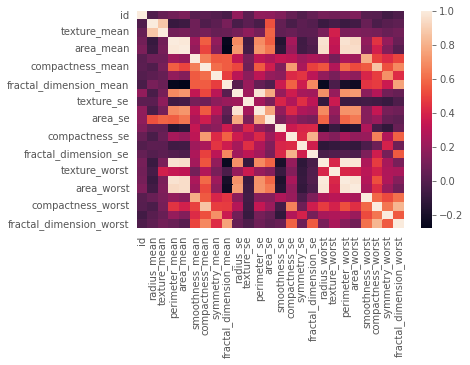

In [167]:
#visualisasi korelasi, semakin terang maka semakin berpengaruh
sns.heatmap(df.corr())
sns.set_style("whitegrid")
plt.show()

## Preprocessing data

In [168]:
#untuk memeriksa kembali data kosong (missing value handling)
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [169]:
#drop id karena diangggap tidak relevan
df.drop('id', axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.1471,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.186,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.1279,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.1052,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198,0.1043,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4,0.1625,0.2364,0.07678


In [170]:
df.isna().sum()/len(df) * 100

diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                463 non-null    object 
 1   radius_mean              463 non-null    float64
 2   texture_mean             463 non-null    float64
 3   perimeter_mean           463 non-null    float64
 4   area_mean                463 non-null    float64
 5   smoothness_mean          463 non-null    float64
 6   compactness_mean         463 non-null    float64
 7   concavity_mean           463 non-null    object 
 8   concave points_mean      463 non-null    object 
 9   symmetry_mean            463 non-null    float64
 10  fractal_dimension_mean   463 non-null    float64
 11  radius_se                463 non-null    float64
 12  texture_se               463 non-null    float64
 13  perimeter_se             463 non-null    float64
 14  area_se                  4

In [172]:
#Melakukan label encoder untuk mengubah tipe data non numerical menjadi numerikal
label_encoder = preprocessing.LabelEncoder()

#encode kolom bertipe object
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
df['concavity_mean'] = label_encoder.fit_transform(df['concavity_mean'])
df['concave points_mean'] = label_encoder.fit_transform(df['concave points_mean'])
df['concavity_se'] = label_encoder.fit_transform(df['concavity_se'])
df['concave points_se'] = label_encoder.fit_transform(df['concave points_se'])
df['concavity_worst'] = label_encoder.fit_transform(df['concavity_worst'])
df['concave points_worst'] = label_encoder.fit_transform(df['concave points_worst'])

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                463 non-null    int64  
 1   radius_mean              463 non-null    float64
 2   texture_mean             463 non-null    float64
 3   perimeter_mean           463 non-null    float64
 4   area_mean                463 non-null    float64
 5   smoothness_mean          463 non-null    float64
 6   compactness_mean         463 non-null    float64
 7   concavity_mean           463 non-null    int64  
 8   concave points_mean      463 non-null    int64  
 9   symmetry_mean            463 non-null    float64
 10  fractal_dimension_mean   463 non-null    float64
 11  radius_se                463 non-null    float64
 12  texture_se               463 non-null    float64
 13  perimeter_se             463 non-null    float64
 14  area_se                  4

In [174]:
temp = df
fitur_obj = ["diagnosis",'concavity_mean','concave points_mean','concavity_se','concave points_se','concavity_worst', 'concave points_worst']
for i in df.columns:
  cek = i in fitur_obj
  if cek==False:
    up_limit = df[i].mean() + 3*df[i].std()
    low_limit = df[i].mean() - 3*df[i].std()
    df = df[(df[i]<up_limit) & (df[i]>low_limit)]
    print("Jumlah Outliers ", i)
    print(len(temp[i]) - len(df[i]))
    print()

Jumlah Outliers  radius_mean
2

Jumlah Outliers  texture_mean
6

Jumlah Outliers  perimeter_mean
12

Jumlah Outliers  area_mean
16

Jumlah Outliers  smoothness_mean
18

Jumlah Outliers  compactness_mean
24

Jumlah Outliers  symmetry_mean
27

Jumlah Outliers  fractal_dimension_mean
33

Jumlah Outliers  radius_se
42

Jumlah Outliers  texture_se
48

Jumlah Outliers  perimeter_se
54

Jumlah Outliers  area_se
60

Jumlah Outliers  smoothness_se
66

Jumlah Outliers  compactness_se
72

Jumlah Outliers  symmetry_se
78

Jumlah Outliers  fractal_dimension_se
86

Jumlah Outliers  radius_worst
87

Jumlah Outliers  texture_worst
87

Jumlah Outliers  perimeter_worst
87

Jumlah Outliers  area_worst
91

Jumlah Outliers  smoothness_worst
93

Jumlah Outliers  compactness_worst
98

Jumlah Outliers  symmetry_worst
104

Jumlah Outliers  fractal_dimension_worst
110



In [175]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,257,319,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,228,333,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,393,424,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,356,392,0.3613,0.08758
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,395,402,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,339,298,0.2364,0.07678
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,302,324,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,319,340,0.3063,0.08368
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,269,290,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,247,285,0.3196,0.11510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,0,11.630,29.29,74.87,415.1,0.09357,0.08574,234,104,0.1799,...,13.12,38.81,86.04,527.8,0.1406,0.2031,263,112,0.2884,0.07220
457,0,13.210,25.25,84.10,537.9,0.08791,0.05205,102,110,0.1619,...,14.35,34.23,91.29,632.9,0.1289,0.1063,137,86,0.2444,0.06788
458,0,13.000,25.13,82.61,520.2,0.08369,0.05073,33,75,0.1667,...,14.34,31.88,91.06,628.5,0.1218,0.1093,38,85,0.2306,0.06291
459,0,9.755,28.20,61.68,290.9,0.07984,0.04626,45,32,0.1621,...,10.67,36.92,68.03,349.9,0.1110,0.1109,67,55,0.2321,0.07211


In [176]:
#Convert data ke csv
df.to_csv('dataset_hasil_eksplorasi.csv', index=False, header=True)

## Data Splitting

In [184]:
#Split data dengan data target adalah fitur Diagnosis
x_teain, x_test, y_train, y_test = train_test_split(
    df.drop(['diagnosis'], axis=1), df['diagnosis'], test_size=0.2, random_state=42)

In [185]:
#Menampilkan panjang data hasil splitting
print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

264 282
71 71


## Pemodelan

In [179]:
def permodelan(x_train, x_test, y_train, y_test):
    
    #memanggil function tpot
    tpot = TPOTClassifier(
                          generations=5, S
                          population_size=30, 
                          cv=5, 
                          random_state=40, 
                          verbosity=2, 
                          n_jobs=1)
    #training model
    model = tpot.fit(x_train, y_train)
    #prediksi data train
    train_pred = model.predict(x_train)
    #Evaluasi model untuk data train
    train_acc = model.score(x_train, y_train)
    train_f1 = f1_score(y_train, train_pred)
    train_precision = precision_score(y_train, train_pred)
    train_recall = recall_score(y_train, train_pred)
    
    #prediksi data test
    test_pred = model.predict(x_test)
    #Evaluasi model untuk data test
    test_acc = model.score(x_test, y_test)
    test_f1 = f1_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)

    # exporting best model
    model.export('tpot_data.py')

    print("Training Performance")
    print("Accuracy Score:", train_acc)
    
    
    print()
    print("Test Performance")
    print("Accuracy Score:", test_acc)
    
    
    print()
    print("Classification Report")
    print(classification_report(y_test, test_pred))

    print()
    print("Confusion Matrix")
    print(confusion_matrix(y_test, test_pred))
    return test_acc, test_recall, model, train_pred, test_pred

In [180]:
# Fungsi Pembuataan Evaluasi Metriks 
def confusion_metrik(eksperimen,name):
  conf_matrix = np.array(confusion_matrix(y_test, eksperimen.predict(x_test)))
  plt.title(f'Confusion Matrix {name}')
  group_names = ['TN', 'FP', 'FN', 'TP']
  group_counts = ["{0:0.0f}".format(val) for val in conf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(val) for val in conf_matrix.flatten()/np.sum(conf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(2, 2)
  sns.heatmap(conf_matrix, annot=labels, cmap='flare', fmt='')
  plt.show()
  recal= recall_score(y_test,eksperimen.predict(x_test)) # Melakukan Pencarian Nilai Recal
  precision = precision_score(y_test,eksperimen.predict(x_test))# Melakukan Pencarian Nilai Precision
  f1Score = f1_score(y_test,eksperimen.predict(x_test))# Melakukan Pencarian Nilai f1 score
  acc = test_acc(y_test,eksperimen.predict(x_test))
  print(f'{name}')
  print(f'Recall\t\t : {recal}')
  print(f'Precision\t : {precision}')
  print(f'F1-Score\t : {f1Score}')
  print(f'Akurasi Score\t : {acc}')
  print('Classification Report: ')
  print(classification_report(y_test, model(x_test)))

In [181]:
test_acc, test_recall, model, train_pred, test_pred = permodelan(x_train, x_test, y_train, y_test)

Optimization Progress:   0%|          | 0/180 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.958345428156749

Generation 2 - Current best internal CV score: 0.958345428156749

Generation 3 - Current best internal CV score: 0.9658925979680697

Generation 4 - Current best internal CV score: 0.9658925979680697

Generation 5 - Current best internal CV score: 0.9658925979680697

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.3, min_samples_leaf=4, min_samples_split=10, n_estimators=100)
Training Performance
Accuracy Score: 0.9848484848484849

Test Performance
Accuracy Score: 0.9550561797752809

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        74
           1       0.82      0.93      0.87        15

    accuracy                           0.96        89
   macro avg       0.90      0.95      0.92        89
weighted avg       0.96      0.96      0.96        89


Confusion Matrix
[[71  3]
 [ 1 14]]
